In [2]:
datasets = ['breast-cancer-wisconsin-data.csv', 'car_evaluation.csv', 'diabetes.csv', 'iris.csv', 'titanic.csv', 'haberman.csv']
output_name = ['diagnosis','eval','Outcome','Species','Survived','Survival']
num_classes = [2,4,2,3,2,2]
num_features = [30,6,8,4,9,3]
useless_features = [['id'],[],[],['Id'],['PassengerId','Name'],[]]
num_cuts = [12,num_features[1],num_features[2],num_features[3],num_features[4],num_features[5]]


In [3]:
from pytorch_DNDT import *
from pytorch_DT import *
from pytorch_nn import *
seed = 1943 #like in the paper's code

In [4]:
#def build_test_DNDT(datafile, output_column_name, num_features, num_cuts, seed=None, exclude_features=[], normalized=False, test_train_split=False):


for i in range(len(datasets)):
    dndt_val_unorm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], False, False)
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False)
    dndt_val_unorm_split = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], False, True)
    dndt_val_norm_split = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, True)
    nn_val = build_test_NN(datasets[i], output_name[i], num_classes[i], num_features[i], seed, useless_features[i])
    dt_val = build_test_DT(datasets[i], output_name[i], seed, useless_features[i])
    print(datasets[i] + ' DNDT Unormalized: ' + str(round(dndt_val_unorm, 3)) + ' DNDT Normalized: ' + str(round(dndt_val_norm, 3)) + ' DNDT Unormalized Split: ' + str(round(dndt_val_unorm_split, 3)) + ' DNDT Normalized Split: ' + str(round(dndt_val_norm_split, 3)) +   ' DT: ' + str(round(dt_val, 3)) + ' NN: ' + str(round(nn_val,3)))

c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


breast-cancer-wisconsin-data.csv DNDT Unormalized: 0.933 DNDT Normalized: 0.958 DNDT Unormalized Split: 0.947 DNDT Normalized Split: 0.939 DT: 0.912 NN: 0.982


c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


car_evaluation.csv DNDT Unormalized: 0.774 DNDT Normalized: 0.788 DNDT Unormalized Split: 0.76 DNDT Normalized Split: 0.783 DT: 0.98 NN: 0.688


c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


diabetes.csv DNDT Unormalized: 0.686 DNDT Normalized: 0.87 DNDT Unormalized Split: 0.636 DNDT Normalized Split: 0.747 DT: 0.701 NN: 0.753


c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iris.csv DNDT Unormalized: 0.96 DNDT Normalized: 0.96 DNDT Unormalized Split: 1.0 DNDT Normalized Split: 0.967 DT: 0.967 NN: 0.8


c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


titanic.csv DNDT Unormalized: 0.636 DNDT Normalized: 0.636 DNDT Unormalized Split: 0.619 DNDT Normalized Split: 0.619 DT: 1.0 NN: 0.619
haberman.csv DNDT Unormalized: 0.735 DNDT Normalized: 0.755 DNDT Unormalized Split: 0.726 DNDT Normalized Split: 0.742 DT: 0.742 NN: 0.726


c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We now check how the number of cutpoints affects the results

In [6]:
cut_points = np.array([1, 2, 3, 4])
iris_res = np.zeros((cut_points.shape))
car_res = np.zeros((cut_points.shape))
hab_res = np.zeros((cut_points.shape))

In [8]:
i = 3
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    iris_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.96
2: 0.9866666666666667
3: 0.9733333333333334
4: 0.9666666666666667


In [9]:
i = 1
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    car_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.7876157407407407
2: 0.9785879629629629
3: 1.0
4: 1.0


In [10]:
i = 5
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    hab_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.7549019607843137
2: 0.7712418300653595
3: 0.7843137254901961
4: 0.8235294117647058


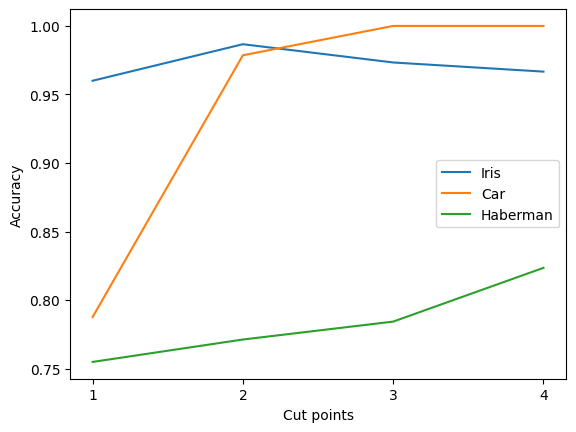

In [12]:
# Plotting
import matplotlib.pyplot as plt
plt.plot(cut_points, iris_res, label="Iris")
plt.plot(cut_points, car_res, label="Car")
plt.plot(cut_points, hab_res, label="Haberman")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

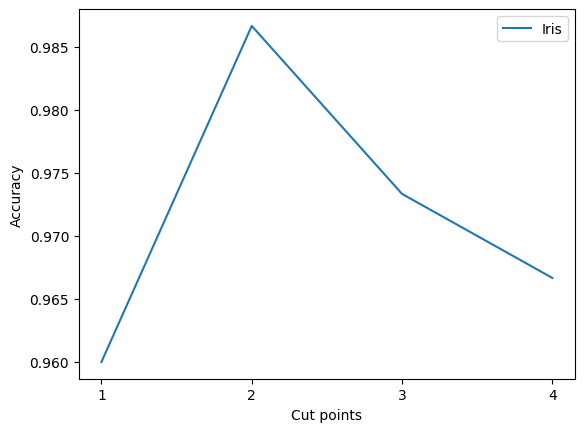

In [13]:
# plot iris
plt.plot(cut_points, iris_res, label="Iris")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

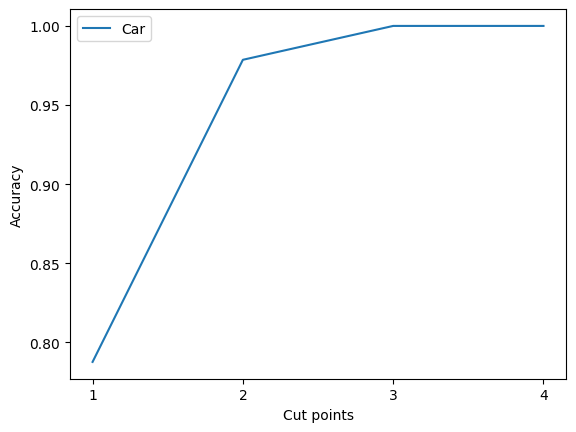

In [14]:
# plot car
plt.plot(cut_points, car_res, label="Car")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

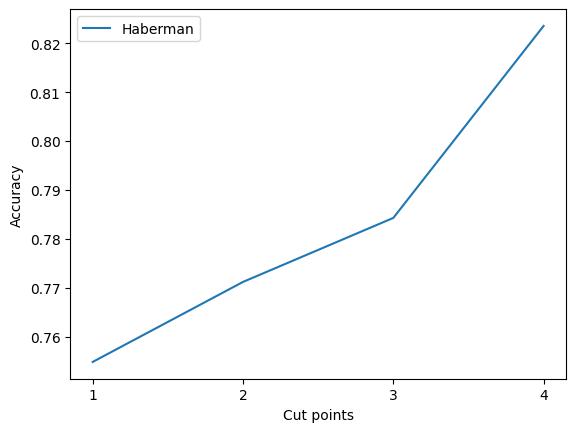

In [15]:
# plot haberman
plt.plot(cut_points, hab_res, label="Haberman")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
diab_res = np.zeros((cut_points.shape))
i = 2
for j in range(cut_points.size):
    dndt_val_norm = build_test_DNDT(datasets[i], output_name[i], num_features[i], num_cuts[i], seed, useless_features[i], True, False, cut_points[j])
    diab_res[j] = dndt_val_norm
    print(f"{cut_points[j]}: {dndt_val_norm}")

1: 0.8697916666666666
2: 0.9596354166666666
3: 0.9947916666666666
4: 1.0


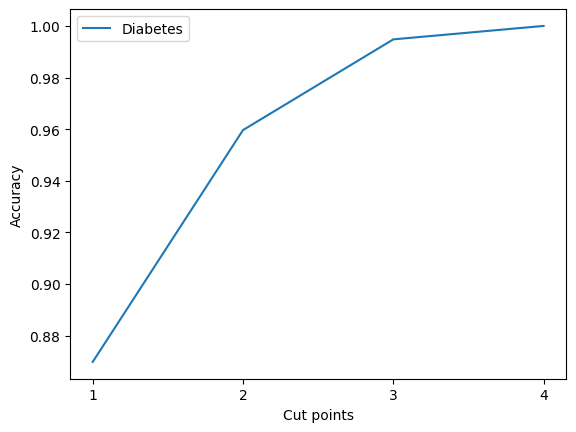

In [17]:
# plot diabetes
plt.plot(cut_points, diab_res, label="Diabetes")
plt.xticks(cut_points)
plt.xlabel("Cut points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()